<h1 style="color:red">Import data from mongo</h1>

In [1]:
import pymongo
import pandas as pd
from pymongo import MongoClient
client = MongoClient()
db = client.movies
collection = db.movies
data = pd.DataFrame(list(collection.find()))

In [3]:
data.head(16)

,_id,gross,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,query,retweets,tweets
0,582e8c68a9742412cc82d5fb,24710273.0,0,0.153519,0.214224,0.576430,0.585985,#TheAccountant,10957,16708
1,582e8c68a9742412cc82d5fc,2182216.0,0,0.514879,0.197917,0.465469,0.260417,#MaxSteel,1301,1781
2,582e8c68a9742412cc82d5fe,707021.0,1,0.046154,0.064655,0.940513,0.790948,#PricelessTheMovie,511,975
3,582e8c68a9742412cc82d5fd,11767210.0,0,0.243336,0.199816,0.230479,0.345918,#KevinHartWhatNow,14787,18045
4,582e8c68a9742412cc82d5ff,28501448.0,0,0.155625,0.214810,0.308969,0.436256,#MadeaHalloween,9847,12710
5,582e8c68a9742412cc82d601,14065500.0,1,0.144015,0.097610,0.314912,0.238816,#OuijaMovie,12413,29983
6,582e8c68a9742412cc82d600,22872490.0,1,0.061304,0.098479,0.967504,0.493195,#JackReacherMovie,8783,10032
7,582e8c68a9742412cc82d602,5461475.0,0,0.168985,0.188103,0.324060,0.288585,#KeepingUpWithTheJoneses,2638,3882
8,582e8c68a9742412cc82d603,14860425.0,1,0.148348,0.236878,0.895807,0.488560,#InfernoMovie,7215,9444
9,582e8c68a9742412cc82d604,44725.0,0,0.342161,0.362162,0.159958,0.324324,#GimmeDanger,759,944


<h1 style="color:blue">Make table readable</h1>

In [4]:
del data['_id']
query = data['query']
data.drop(labels=['query'], axis=1, inplace=True)
data.insert(0, 'query', query)
tweets = data['tweets']
data.drop(labels=['tweets'], axis=1, inplace=True)
data.insert(1, 'tweets', tweets)
retweets = data['retweets']
data.drop(labels=['retweets'], axis=1, inplace=True)
data.insert(2, 'retweets', retweets)
data.head(16)

,query,tweets,retweets,gross,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets
0,#TheAccountant,16708,10957,24710273.0,0,0.153519,0.214224,0.576430,0.585985
1,#MaxSteel,1781,1301,2182216.0,0,0.514879,0.197917,0.465469,0.260417
2,#PricelessTheMovie,975,511,707021.0,1,0.046154,0.064655,0.940513,0.790948
3,#KevinHartWhatNow,18045,14787,11767210.0,0,0.243336,0.199816,0.230479,0.345918
4,#MadeaHalloween,12710,9847,28501448.0,0,0.155625,0.214810,0.308969,0.436256
5,#OuijaMovie,29983,12413,14065500.0,1,0.144015,0.097610,0.314912,0.238816
6,#JackReacherMovie,10032,8783,22872490.0,1,0.061304,0.098479,0.967504,0.493195
7,#KeepingUpWithTheJoneses,3882,2638,5461475.0,0,0.168985,0.188103,0.324060,0.288585
8,#InfernoMovie,9444,7215,14860425.0,1,0.148348,0.236878,0.895807,0.488560
9,#GimmeDanger,944,759,44725.0,0,0.342161,0.362162,0.159958,0.324324


In [5]:
gross = data['gross']
data.drop(labels=['gross'], axis=1, inplace=True)
data.insert(8, 'gross', gross)
data.head(16)

,query,tweets,retweets,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross
0,#TheAccountant,16708,10957,0,0.153519,0.214224,0.576430,0.585985,24710273.0
1,#MaxSteel,1781,1301,0,0.514879,0.197917,0.465469,0.260417,2182216.0
2,#PricelessTheMovie,975,511,1,0.046154,0.064655,0.940513,0.790948,707021.0
3,#KevinHartWhatNow,18045,14787,0,0.243336,0.199816,0.230479,0.345918,11767210.0
4,#MadeaHalloween,12710,9847,0,0.155625,0.214810,0.308969,0.436256,28501448.0
5,#OuijaMovie,29983,12413,1,0.144015,0.097610,0.314912,0.238816,14065500.0
6,#JackReacherMovie,10032,8783,1,0.061304,0.098479,0.967504,0.493195,22872490.0
7,#KeepingUpWithTheJoneses,3882,2638,0,0.168985,0.188103,0.324060,0.288585,5461475.0
8,#InfernoMovie,9444,7215,1,0.148348,0.236878,0.895807,0.488560,14860425.0
9,#GimmeDanger,944,759,0,0.342161,0.362162,0.159958,0.324324,44725.0


<h2>Plotting</h2>

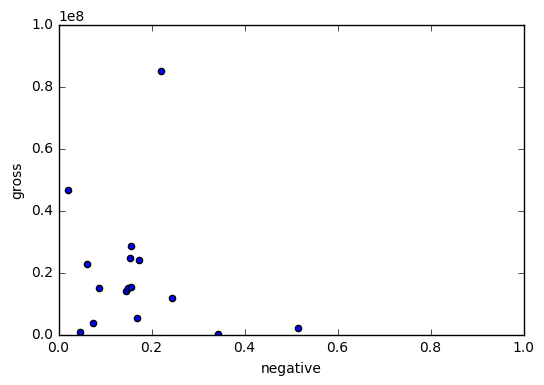

In [8]:
import matplotlib.pyplot as plt
plt.ylabel('gross')
plt.xlabel('negative')
plt.axis([0, 1, 0, 100000000])
plt.scatter(data['negative'], data['gross'])
plt.show()

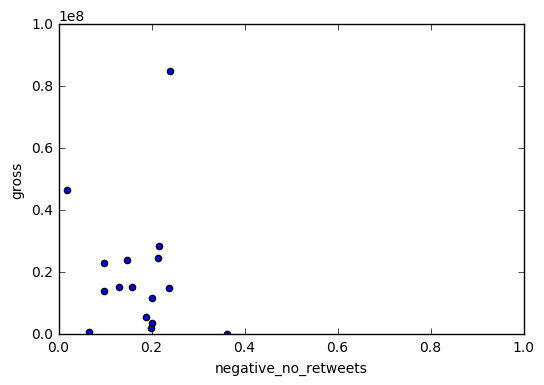

In [9]:
plt.ylabel('gross')
plt.xlabel('negative_no_retweets')
plt.axis([0, 1, 0, 100000000])
plt.scatter(data['negative_no_retweets'], data['gross'])
plt.show()

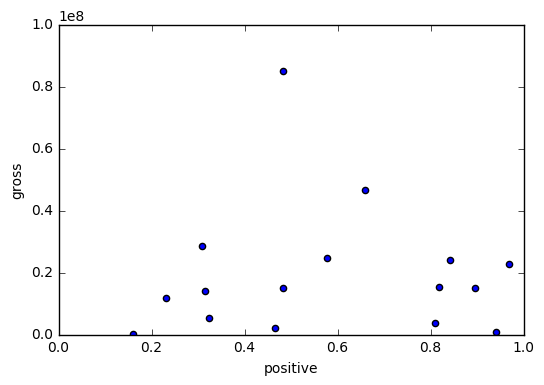

In [10]:
plt.ylabel('gross')
plt.xlabel('positive')
plt.axis([0, 1, 0, 100000000])
plt.scatter(data['positive'], data['gross'])
plt.show()

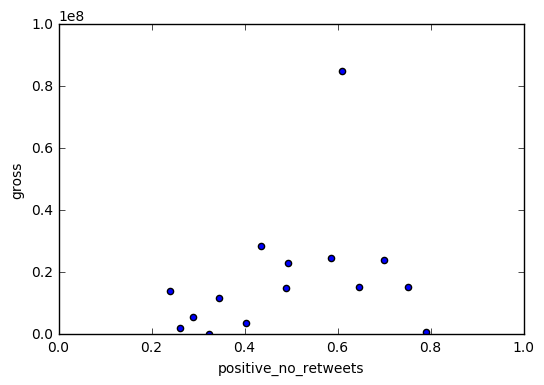

In [11]:
plt.ylabel('gross')
plt.xlabel('positive_no_retweets')
plt.axis([0, 1, 0, 100000000])
plt.scatter(data['positive_no_retweets'], data['gross'])
plt.show()

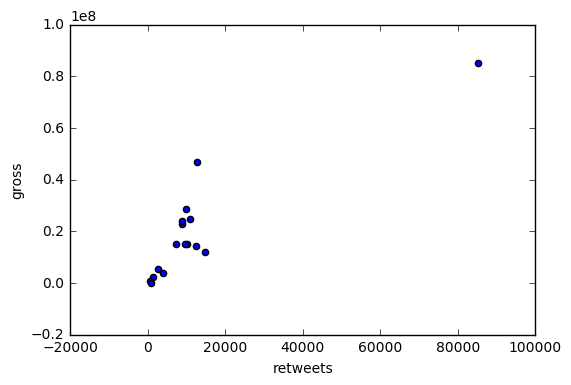

In [12]:
plt.ylabel('gross')
plt.xlabel('retweets')
plt.scatter(data['retweets'], data['gross'])
plt.show()

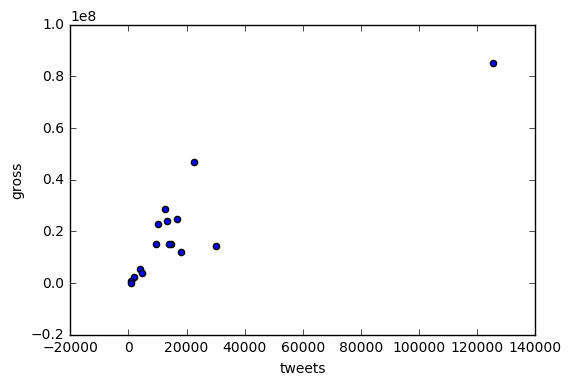

In [13]:
plt.ylabel('gross')
plt.xlabel('tweets')
plt.scatter(data['tweets'], data['gross'])
plt.show()

In [14]:
data['percentretweets'] = data.retweets/data.tweets
data.head(16)

,query,tweets,retweets,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross,percentretweets
0,#TheAccountant,16708,10957,0,0.153519,0.214224,0.576430,0.585985,24710273.0,0.655794
1,#MaxSteel,1781,1301,0,0.514879,0.197917,0.465469,0.260417,2182216.0,0.730488
2,#PricelessTheMovie,975,511,1,0.046154,0.064655,0.940513,0.790948,707021.0,0.524103
3,#KevinHartWhatNow,18045,14787,0,0.243336,0.199816,0.230479,0.345918,11767210.0,0.819451
4,#MadeaHalloween,12710,9847,0,0.155625,0.214810,0.308969,0.436256,28501448.0,0.774744
5,#OuijaMovie,29983,12413,1,0.144015,0.097610,0.314912,0.238816,14065500.0,0.414001
6,#JackReacherMovie,10032,8783,1,0.061304,0.098479,0.967504,0.493195,22872490.0,0.875498
7,#KeepingUpWithTheJoneses,3882,2638,0,0.168985,0.188103,0.324060,0.288585,5461475.0,0.679547
8,#InfernoMovie,9444,7215,1,0.148348,0.236878,0.895807,0.488560,14860425.0,0.763977
9,#GimmeDanger,944,759,0,0.342161,0.362162,0.159958,0.324324,44725.0,0.804025


In [15]:
percentretweets = data['percentretweets']
data.drop(labels=['percentretweets'], axis=1, inplace=True)
data.insert(3, 'percentretweets', percentretweets)
data.head(16)

,query,tweets,retweets,percentretweets,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross
0,#TheAccountant,16708,10957,0.655794,0,0.153519,0.214224,0.576430,0.585985,24710273.0
1,#MaxSteel,1781,1301,0.730488,0,0.514879,0.197917,0.465469,0.260417,2182216.0
2,#PricelessTheMovie,975,511,0.524103,1,0.046154,0.064655,0.940513,0.790948,707021.0
3,#KevinHartWhatNow,18045,14787,0.819451,0,0.243336,0.199816,0.230479,0.345918,11767210.0
4,#MadeaHalloween,12710,9847,0.774744,0,0.155625,0.214810,0.308969,0.436256,28501448.0
5,#OuijaMovie,29983,12413,0.414001,1,0.144015,0.097610,0.314912,0.238816,14065500.0
6,#JackReacherMovie,10032,8783,0.875498,1,0.061304,0.098479,0.967504,0.493195,22872490.0
7,#KeepingUpWithTheJoneses,3882,2638,0.679547,0,0.168985,0.188103,0.324060,0.288585,5461475.0
8,#InfernoMovie,9444,7215,0.763977,1,0.148348,0.236878,0.895807,0.488560,14860425.0
9,#GimmeDanger,944,759,0.804025,0,0.342161,0.362162,0.159958,0.324324,44725.0


In [16]:
del data['query']

<h1 style="color:orange">Sklearn Stuff</h1>

In [66]:
total_data = data.values
f_col = ['tweets', 'percentretweets', 'negative_no_retweets', 'positive_no_retweets']
X = data[f_col]
y = data[['gross']]
from sklearn import preprocessing
#data_to_scale = total_data[:,:12]
scaled_X = preprocessing.scale(X)
scaled_y = preprocessing.scale(y)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=2)
X_train

array([[ 0.39322341, -2.418963  , -0.95171453, -1.29484334],
       [-0.06971032, -0.35445691,  0.52130737,  0.2599923 ],
       [-0.61944195,  0.91119694,  2.39000775, -0.91188524],
       [-0.02308566,  1.04290897,  0.33931413, -0.81517665],
       [-0.59025359,  0.28331339,  0.31532457, -1.19810301],
       [-0.48835586,  1.16295084,  0.36422563, -0.56266738],
       [-0.51698626, -0.15164571,  0.19136093, -1.07194697],
       [-0.16355248, -0.12009523, -0.55736528,  0.52954276],
       [-0.6183609 , -1.47888039, -1.36798115,  1.17794363],
       [-0.13694469, -0.1243202 , -0.20198439,  0.99861139],
       [-0.30251978,  1.52145775, -0.94073488, -0.15558055],
       [-0.18925359, -0.21361247, -0.31548138,  0.7712388 ],
       [ 3.72578832, -0.15613705,  0.84548753,  0.36090223],
       [-0.32302487,  0.56925087,  0.80746247, -0.17633742]])

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
clf = LinearRegression()
clf.fit(X_train, y_train)

print (clf.intercept_)
print (clf.coef_)

[ 17625183.44029273]
[[ 18453580.32083746   3148210.24264954  -1224822.35100184
    3910853.44635941]]


In [68]:
clf.predict(X_test)

array([[ 28666489.99604058],
       [ 13594192.04864307]])

In [69]:
y_test


,gross
12,46581142.0
4,28501448.0
